# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Load dependencies and function declaration

We begin by importing the necessary packages and declaring the __ddpg__ algorithm executing function. 

In [1]:
#%% Imports & Function declaration
# Standard imports
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment

# Developed imports
from ddpg import Agent

# Parameters
model_dir = 'models/'
random_seed = 7


def execute_ddpg(ddpg_agent: Agent, num_episodes: int = 3000, max_episode_t: int = 2000, learn_each : int = 5,
                 consec_learn_iter: int = 10) -> list:
    """
    DDPG - Execution Algorithm Implementation
    :param ddpg_agent: agent in charge of controling both Actor and Critic neural networks behaviour
    :param num_episodes: number of episodes the algorithm will train
    :param max_episode_t: maximum number of time steps to play at each episode
    :param learn_each: teps in a game before triggering the learning procedure
    :param consec_learn_iter: number of consecutive learning iterations
    :return: results obtained during the training procedure
    """
    # 1| Initialization
    global_score = []
    global_score_deque = deque(maxlen=100)

    # 2| Episode run
    for i_episode in range(1, num_episodes + 1):

        # 2.0| Initialization of episode
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        ddpg_agent.reset()

        # 2.1| Episode Run
        for t_step in range(max_episode_t):
            # 2.1.1| Agent decision and interaction
            actions = ddpg_agent.act(states)
            env_info = env.step(actions)[brain_name]

            # 2.1.2| Feedback on action
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            # 2.1.3| Experience saving
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                ddpg_agent.memorize(state, action, reward, next_state, done)

            # 2.1.4| Update values
            scores += rewards
            states = next_states

            # 2.1.5| Agent learning
            if t_step % learn_each == 0:
                for _ in range(consec_learn_iter):
                    ddpg_agent.trigger_learning()

            # 2.1.6| Episode ending
            if np.any(dones):
                break

        # 2.2| Episode post-processing
        # 2.2.1| Scoring
        global_score_deque.append(np.max(scores))
        global_score.append(np.max(scores))

        if i_episode % 10 == 0:
            print('Episode {}\tTotal Average Score: {:.2f}\tMean: {:.2f}'.format(
                    i_episode, np.mean(global_score_deque), np.mean(scores)))

        if i_episode % 50 == 0:
            torch.save(ddpg_agent.actor_local.state_dict(),
                       model_dir + 'checkpoint__actor_local__episode_' + str(i_episode) + '.pth')
            torch.save(ddpg_agent.actor_target.state_dict(),
                       model_dir + 'checkpoint__actor_target__episode_' + str(i_episode) + '.pth')
            torch.save(ddpg_agent.critic_local.state_dict(),
                       model_dir + 'checkpoint__critic_local__episode_' + str(i_episode) + '.pth')
            torch.save(ddpg_agent.critic_target.state_dict(),
                       model_dir + 'checkpoint__critic_target__episode_' + str(i_episode) + '.pth')

        if np.mean(global_score_deque) >= 0.5 and i_episode >= 100:
            print('\rEpisode employed for completing the challenge {}'.format(i_episode))

            torch.save(ddpg_agent.actor_local.state_dict(),
                       model_dir + 'checkpoint__actor_local__episode_' + str(i_episode) + '.pth')
            torch.save(ddpg_agent.actor_target.state_dict(),
                       model_dir + 'checkpoint__actor_target__episode_' + str(i_episode) + '.pth')
            torch.save(ddpg_agent.critic_local.state_dict(),
                       model_dir + 'checkpoint__critic_local__episode_' + str(i_episode) + '.pth')
            torch.save(ddpg_agent.critic_target.state_dict(),
                       model_dir + 'checkpoint__critic_target__episode_' + str(i_episode) + '.pth')
            break

    return global_score

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 


In [2]:
#%% Load Tennis environment
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

# Get brain information
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size

# Environment information
env_info = env.reset(train_mode=False)[brain_name]
state_size = env_info.vector_observations.shape[1]
num_agents = len(env_info.agents)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 3. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Episode 10	Total Average Score: 0.01	Mean: -0.00


/home/axel-engineer/Documents/19_udacity_drlnd/4_003_Project_Collaboration_Competition/ddpg.py:109: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)  # Gradient clipping applied


Episode 20	Total Average Score: 0.02	Mean: -0.00
Episode 30	Total Average Score: 0.02	Mean: -0.00
Episode 40	Total Average Score: 0.01	Mean: 0.05
Episode 50	Total Average Score: 0.02	Mean: -0.00
Episode 60	Total Average Score: 0.02	Mean: 0.05
Episode 70	Total Average Score: 0.04	Mean: 0.05
Episode 80	Total Average Score: 0.04	Mean: -0.00
Episode 90	Total Average Score: 0.05	Mean: 0.05
Episode 100	Total Average Score: 0.04	Mean: -0.00
Episode 110	Total Average Score: 0.05	Mean: 0.20
Episode 120	Total Average Score: 0.06	Mean: 0.25
Episode 130	Total Average Score: 0.08	Mean: 0.25
Episode 140	Total Average Score: 0.09	Mean: 0.05
Episode 150	Total Average Score: 0.10	Mean: 0.15
Episode 160	Total Average Score: 0.11	Mean: 0.10
Episode 170	Total Average Score: 0.12	Mean: 0.10
Episode 180	Total Average Score: 0.14	Mean: 0.05
Episode 190	Total Average Score: 0.15	Mean: -0.00
Episode 200	Total Average Score: 0.20	Mean: 0.15
Episode 210	Total Average Score: 0.21	Mean: 0.30
Episode 220	Total Aver

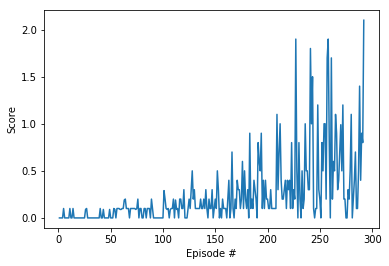

In [3]:
#%% DDPG - Agent Training
agent = Agent(state_size=state_size, action_size=action_size, random_seed=random_seed)
score = execute_ddpg(ddpg_agent=agent)

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(score)+1), score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [4]:
#%% Environment- Close
env.close()